<a href="https://colab.research.google.com/github/alvarischa/Linear-Regression-/blob/master/Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alva Rischa Qhisthana Pratika (DS0202)
Multiple Linear Regression

Multiple linear regression atau analisis regresi linier berganda merupakan analisis yang digunakan untuk mengetahui hubungan lebih dari satu variabel bebas terhadap variabel terikat. Analisis ini dapat digunakan untuk memprediksi naik turunnya variabel terikat akibat perubahan nilai-nilai variabel bebas.

Rumus umum multiple linear regression dapat dilihat dibawah ini:

Y' = a + b1X1 + b2X2 + .... +bnXn

yang mana a merupakan intercept, b adalah slope, X dan Y' masing-masing variabel bebas dan terikat.

Berikut ini contoh multiple linear regression, pengamatan pengaruh dan hubungan harga dan pemasangan iklan terhadap penjualan pie. Penjualan pie dinggap sebagai variabel terikat sedangkan harga dan pemasangan iklan sebagai variabel bebas. 

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/alvarischa/Linear-Regression-/master/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


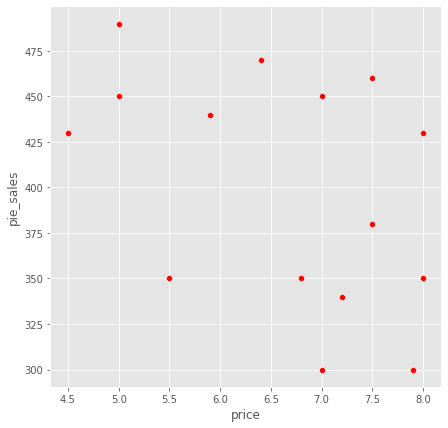

In [ ]:
# Visualize the data using scatterplot
sns.scatterplot(x="price",y="pie_sales", data= df, color='red')

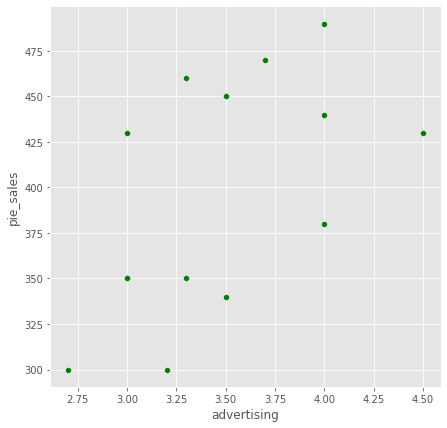

In [ ]:
# Visualize the data using scatterplot
sns.scatterplot(x="advertising",y="pie_sales", data= df, color='green')

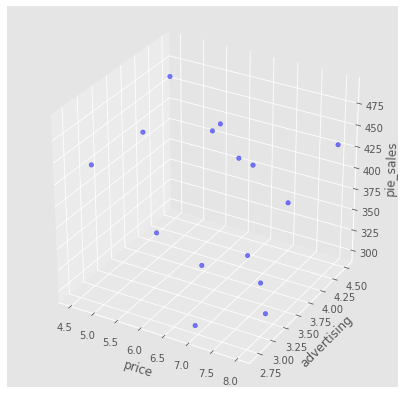

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['price'],df['advertising'],df['pie_sales'],c='blue', marker='o', alpha=0.5)
ax.set_xlabel('price')
ax.set_ylabel('advertising')
ax.set_zlabel('pie_sales')
plt.show()

In [ ]:
X = df[['price','advertising']]
Y = df['pie_sales']

In [ ]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


Berdasarkan nilai intercept dan coefficient maka persamaan regressinya menjadi:

Y' = a + b1X1 + b2X2

Y' = 306.5261932837436 + -24.97508952(X1) + 74.13095749(X2)

artinya:

*   ketika price dan advertising bernilai 0 maka penjualan pie akan bernilai sama dengan interceptnya atau penjualan pie = 306.5261932837436
*   nilai coefficients price bernilai negatif artinya ketika nilai price mengalami kenaikan 1% dan nilai advertising tetap maka penjualan pie akan mengalami penurunan sebesar 1% itu. Hal ini menunjukan adanya hubungan negatif antara nilai price dan nilai sales pie nya, ketika price naik maka penjualan pie turun
*   nilai coefficients advertising bernilai positif artinya ketika nilai advertising mengalami kenaikan 1% dan nilai price tetap maka penjualan pie akan mengalami kenaikan sebesar 1% itu. Hal ini menunjukan adanya hubungan positif antara nilai advertising dan nilai sales pie nya, ketika price naik maka penjualan pie naik






In [ ]:
# Visualizing Linear Regression 3D
x_s, y_s = np.meshgrid(np.linspace(df.price.min(), df.price.max()),np.linspace(df.advertising.min(), df.advertising.max()))
onlyX = pd.DataFrame({'price': x_s.ravel(), 'advertising': y_s.ravel()})
fittedY=regr.predict(onlyX)
fittedY=np.array(fittedY)

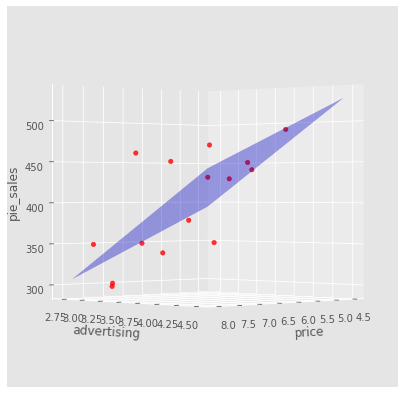

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['price'],df['advertising'],df['pie_sales'],c='red', marker='o', alpha=0.8)
ax.plot_surface(x_s,y_s,fittedY.reshape(x_s.shape), color='b', alpha=0.4)
ax.set_xlabel('price')
ax.set_ylabel('advertising')
ax.set_zlabel('pie_sales')
ax.view_init(0, 45) 
plt.show()

In [ ]:
# prediction with sklearn
new_price = 5.5
new_advertising = 3.5
print ('Predicted  Pie_sales: \n', regr.predict([[new_price,new_advertising]]))

Predicted  Pie_sales: 
 [428.62155215]


In [ ]:
X = sm.add_constant(X) # adding a constant

In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0120
Time:                        03:41:07   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

1. Analisis Determinasi (R-squared dan Adj. R-squared)

  


Analisis determinasi digunakan untuk mengetahui seberapa besar pengaruh kombinasi variabel bebas secara bersama – sama mempengaruhi variabel terikat. Nilai R-squared berkisar antara 0 - 1. Ketika nilai R-squared bernilai 0 maka tidak ada pengaruh yang diberikan variable bebas terhadap variabel terikat. Pengaruh variabel bebas terhadap variabel terikat bernilai sempurna apabila nilai R-squared sama dengan 1. Pada model summary diatas nilai R-squared nya adalah 0.521 atau 52,1%, yang artinya price dan advertising (variabel bebas) memberikan pengaruh terhadap penjualan pie (variabel terikat) sebesar 52,1% sedangkan sisanya dipengaruhi oleh variabel lain diluar variabel bebas yang ada.

Selanjutnya  Adj. R-squared atau nilai R-squared yang telah disesuaikan akan menghitung setiap penambahan variabel dan akan mengestimasi nilai R squared dari penambahan tersebut. Apabila penambahan variabel baru memperbaiki model hasil regresi dari pada estimasi maka nilai Adj. R-squared akan bertambah. Namun apabila model baru justru lebih kecil dari estimasi maka Adj. R-squarednya akan berkurang.

2. Uji F

Pengujian ini menunjukan adanya pengaruh secara signifikan antara variabel bebas (price and advertising) dan variabel terikat (sales pie). Tahap - tahap uji F adalah sebagai berikut:

a. hipotesis

H0 = tidak ada pengaruh secara signifikan secara bersama sama

H1 = adanya pengaruh signifikan secara bersama sama

b. tingkat signifikan a= 5%

c. berdasarkan data diatas besarnya F hitung adalah 6,539, maka besarnya (jumlah variabel–1)  = 2 dan (jumlah kasus-jumlah variabel bebas-1) atau 15-2-1  = 12 maka dapat dicari dengan excel => finv(0,05;2;12) dan nilai F tabel = 3,885293835

d. H0 akan diterima bila F hitung < F tabel dan H0 ditolak bila F hitung > F tabel, sehingga 6,539 > 3,885, atau F hitung > F tabel, artinya H0 ditolak atau adanya pengaruh signifikan secara bersama-sama antara price dan advertising terhadap sales pie.

3. Uji T

Pengujian ini menunjukan adanya pengaruh secara parsial antara variabel bebas (price and advertising) dan variabel terikat (sales pie). Tahap - tahap uji T adalah sebagai berikut:


> price

a. hipotesis

H0 = tidak ada pengaruh signifikan secara parsial 

H1 = adanya pengaruh  signifikan secara  parsial

b. tingkat signifikan a= 5%

c. berdasarkan data diatas besarnya T hitung adalah -2,306 dengan destribusi t dicari pada a/2 = 5%/2 = 2,5% = 0,025, maka besarnya (jumlah variabel–1) = 2 dan (jumlah kasus-jumlah variabel bebas-1) atau 15-2-1 = 12 maka dapat dicari dengan excel => tinv(0,05;12) dan nilai t tabel = -2,1788

d.  H0 diterima jika -t tabel < t hitung < t tabel, H0 ditolak jika -t hitung < -t tabel atau t hitung > t tabel, sehingga -2,306 < -2,1788, atau t hitung < t tabel, artinya H0 diterima atau tidak adanya pengaruh signifikan secara parsial antara price dan advertising terhadap sales pie.

> advertising

a. hipotesis

H0 = tidak ada pengaruh  signifikan  secara parsial

H1 = adanya pengaruh  signifikan  secara parsial

b. tingkat signifikan a= 5%

c. berdasarkan data diatas besarnya T hitung adalah  2,855 dengan destribusi t dicari pada a/2 = 5%/2 = 2,5% = 0.025, maka besarnya (jumlah variabel–1) = 2 dan (jumlah kasus-jumlah variabel bebas-1) atau 15-2-1 = 12 maka dapat dicari dengan excel => tinv(0,05;12) dan nilai t tabel = 2,1788

d.   H0 diterima jika -t tabel £ t hitung £ t tabel dan H0 ditolak jika -t hitung < -t tabel atau t hitung > t tabel, sehingga 2,855 > 2,1788, atau t hitung > t tabel, artinya H0 ditolak atau adanya pengaruh signifikan secara parsial antara price dan advertising terhadap sales pie.



